Prepare a model for the HR department to predict the Attrition and give the insights from the data
about the important factors associated with the attrition so that HR can take the corrective or
preventive measures to stop or control the attrition.

# Import Libraries

In [1]:
import time
import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image  
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

# Read the CSV File and check it's attributes

In [2]:
# Read the CSV File. File path to be modified if executed on a different Machine / OS

df = pd.read_csv('EDA Sample Files/HR_Employee_Attrition_Data.csv')
# dx = ['No', 'Yes']
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# Check the column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.shape
# Insights: The dataset has 2940 rows and 35 columns

(2940, 35)

In [5]:
df.dtypes
# Insights: There are 9 object type variable columns that we will either drop or convert to numeric later

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Check for Missing Data

total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# Insight: There is no missing data in any of the columns

,Total,Percent
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


# Attrition based on Gender

In [7]:
# Categories available in Gender
df["Gender"].value_counts()

Male      1764
Female    1176
Name: Gender, dtype: int64

[Text(0, 0, '17.0068'), Text(0, 0, '14.7959')]

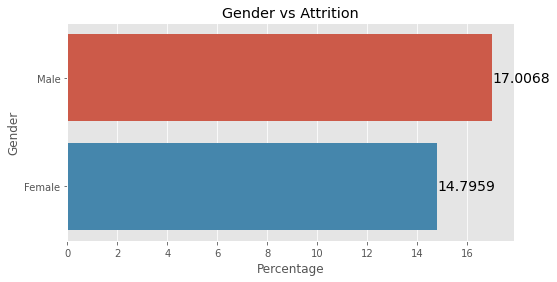

In [8]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
m = df[(df["Gender"]=="Male") & (df["Attrition"]=="Yes")].value_counts('Gender')[0] / df[(df["Gender"]=="Male")].value_counts('Gender')[0]
f = df[(df["Gender"]=="Female") & (df["Attrition"]=="Yes")].value_counts('Gender')[0] / df[(df["Gender"]=="Female")].value_counts('Gender')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
gender_attrition_count = pd.DataFrame(data = [[m*100, f*100]], columns = ['Male', 'Female'])

# Plot Ratio of Male:Female in Attrition
f, ax = plt.subplots(figsize=(8,4))
sns.barplot(ax = ax, data = gender_attrition_count, orient = 'h')
ax.set_title("Gender vs Attrition")
plt.ylabel("Gender")
plt.xlabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

# Insights: There are more males than females in the dataset
# Males are slightly more likely to quit (17%) than Females (14.8%)

# Attrition based on Marital Status

In [9]:
# Categories available in MaritalStatus
df["MaritalStatus"].value_counts()

Married     1346
Single       940
Divorced     654
Name: MaritalStatus, dtype: int64

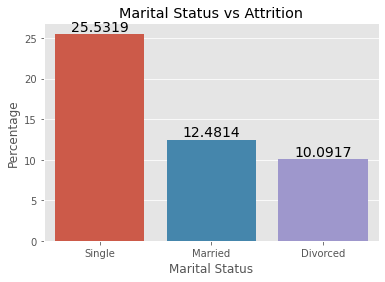

In [10]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
si = df[(df["MaritalStatus"]=="Single")   & (df["Attrition"]=="Yes")].value_counts('MaritalStatus')[0] / df[(df["MaritalStatus"]=="Single")].value_counts('MaritalStatus')[0]
mr = df[(df["MaritalStatus"]=="Married")  & (df["Attrition"]=="Yes")].value_counts('MaritalStatus')[0] / df[(df["MaritalStatus"]=="Married")].value_counts('MaritalStatus')[0]
di = df[(df["MaritalStatus"]=="Divorced") & (df["Attrition"]=="Yes")].value_counts('MaritalStatus')[0] / df[(df["MaritalStatus"]=="Divorced")].value_counts('MaritalStatus')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
ms_attrition_count = pd.DataFrame(data = [[si*100, mr*100, di*100]], columns = ['Single', 'Married', 'Divorced'])

# Marital Status vs Attrition Plot
f, ax = plt.subplots(figsize=(6,4))
sns.barplot(ax = ax, data = ms_attrition_count)
ax.set_title("Marital Status vs Attrition")
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is high for Single Employees (25.5%) compared to Married (12.5%) and Divorced (10%)

# Attrition Based on Overtime

In [11]:
# Categories available in OverTime
df["OverTime"].value_counts()

No     2108
Yes     832
Name: OverTime, dtype: int64

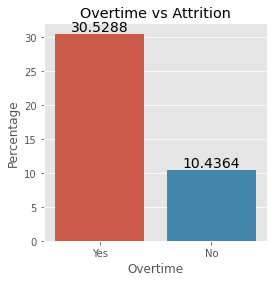

In [12]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
ot   = df[(df["OverTime"]=="Yes") & (df["Attrition"]=="Yes")].value_counts('OverTime')[0] / df[(df["OverTime"]=="Yes")].value_counts('OverTime')[0]
n_ot = df[(df["OverTime"]=="No")  & (df["Attrition"]=="Yes")].value_counts('OverTime')[0] / df[(df["OverTime"]== "No")].value_counts('OverTime')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
ot_attrition_count = pd.DataFrame(data = [[ot*100, n_ot*100]], columns = ['Yes', 'No'])

# Overtime vs Attrition Plot
f, ax = plt.subplots(figsize=(4,4))
sns.barplot(ax = ax, data = ot_attrition_count)
ax.set_title("Overtime vs Attrition")
plt.xlabel("Overtime")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Employees working overtime has a much higher Attrition (30%) than employees not working overtime (10%)

# Attrition based on Business Travel

In [13]:
# Categories available in BusinessTravel
df["BusinessTravel"].value_counts()

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64

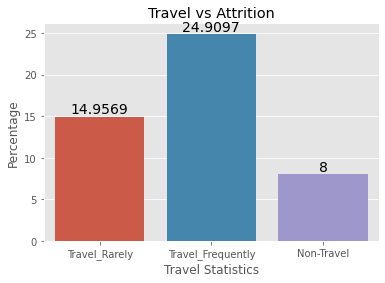

In [14]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
tr = df[(df["BusinessTravel"]=="Travel_Rarely")     & (df["Attrition"]=="Yes")].value_counts('BusinessTravel')[0] / df[(df["BusinessTravel"]=="Travel_Rarely")].value_counts('BusinessTravel')[0]
tf = df[(df["BusinessTravel"]=="Travel_Frequently") & (df["Attrition"]=="Yes")].value_counts('BusinessTravel')[0] / df[(df["BusinessTravel"]=="Travel_Frequently")].value_counts('BusinessTravel')[0]
nt = df[(df["BusinessTravel"]=="Non-Travel")        & (df["Attrition"]=="Yes")].value_counts('BusinessTravel')[0] / df[(df["BusinessTravel"]=="Non-Travel")].value_counts('BusinessTravel')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
travel_attrition_count = pd.DataFrame(data = [[tr*100, tf*100, nt*100]], 
                                      columns = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'])

# Attrition plot based on Business Travel
f, ax = plt.subplots(figsize=(6,4))
sns.barplot(ax = ax, data = travel_attrition_count)
ax.set_title("Travel vs Attrition")
plt.xlabel("Travel Statistics")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is highest among employees who travel frequently (25%), folowed by those who travel rarely (15%)

# Attrition based on Department

In [15]:
# Categories available in Department
df["Department"].value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

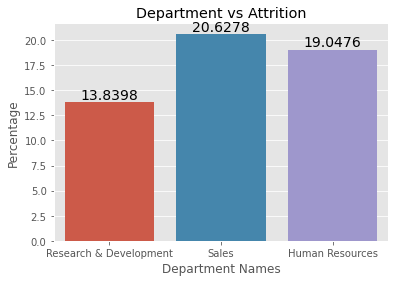

In [16]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
rnd = df[(df["Department"]=="Research & Development") & (df["Attrition"]=="Yes")].value_counts('Department')[0] / df[(df["Department"]=="Research & Development")].value_counts('Department')[0]
sal = df[(df["Department"]=="Sales") & (df["Attrition"]=="Yes")].value_counts('Department')[0] / df[(df["Department"]=="Sales")].value_counts('Department')[0]
hr  = df[(df["Department"]=="Human Resources") & (df["Attrition"]=="Yes")].value_counts('Department')[0] / df[(df["Department"]=="Human Resources")].value_counts('Department')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
dept_attrition_count = pd.DataFrame(data = [[rnd*100, sal*100, hr*100]], 
                                    columns = ['Research & Development', 'Sales', 'Human Resources'])

# Attrition plot based on Department
f, ax = plt.subplots(figsize=(6,4))
sns.barplot(ax = ax, data = dept_attrition_count)
ax.set_title("Department vs Attrition")
plt.xlabel("Department Names")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is highest in Sales (20.6%), followed by Human Resources (19%)

# Attrition based on Job Role

In [17]:
# Categories available in Job Role
df["JobRole"].value_counts()

Sales Executive              652
Research Scientist           584
Laboratory Technician        518
Manufacturing Director       290
Healthcare Representative    262
Manager                      204
Sales Representative         166
Research Director            160
Human Resources              104
Name: JobRole, dtype: int64

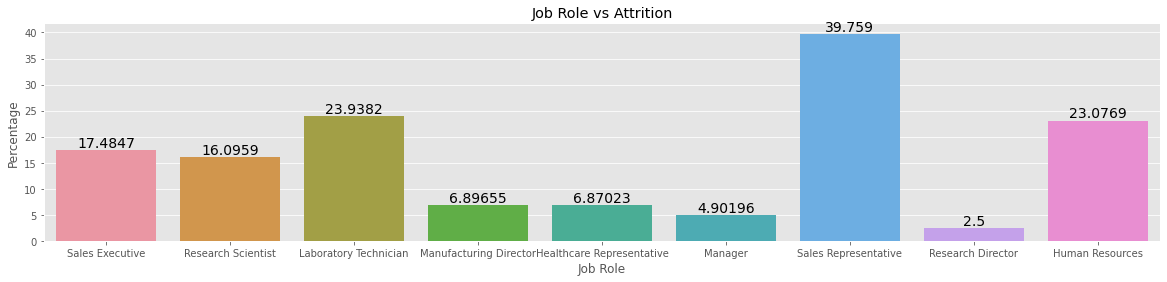

In [18]:
# Number of objects in each category where Attrition == Yes / Total number of objects in that category:
se = df[(df["JobRole"]=="Sales Executive") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Sales Executive")].value_counts('JobRole')[0]
rs = df[(df["JobRole"]=="Research Scientist") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Research Scientist")].value_counts('JobRole')[0]
lt = df[(df["JobRole"]=="Laboratory Technician") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Laboratory Technician")].value_counts('JobRole')[0]
md = df[(df["JobRole"]=="Manufacturing Director") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Manufacturing Director")].value_counts('JobRole')[0]
hcr= df[(df["JobRole"]=="Healthcare Representative") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Healthcare Representative")].value_counts('JobRole')[0]
mgr= df[(df["JobRole"]=="Manager") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Manager")].value_counts('JobRole')[0]
sr = df[(df["JobRole"]=="Sales Representative") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Sales Representative")].value_counts('JobRole')[0]
rd = df[(df["JobRole"]=="Research Director") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Research Director")].value_counts('JobRole')[0]
hr = df[(df["JobRole"]=="Human Resources") & (df["Attrition"]=="Yes")].value_counts('JobRole')[0] / df[(df["JobRole"]=="Human Resources")].value_counts('JobRole')[0]

# Create a dataframe with the above data (ratio) as a percentage for each category and add Column Names:
job_role_count = pd.DataFrame(data = [[se*100, rs*100, lt*100, md*100, hcr*100, mgr*100, sr*100, rd*100, hr*100]], 
                              columns = ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 
                                         'Manufacturing Director', 'Healthcare Representative', 'Manager',
                                         'Sales Representative', 'Research Director', 'Human Resources'])

# Ratio of Male:Female
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(ax = ax, data = job_role_count)
ax.set_title("Job Role vs Attrition")
plt.xlabel("Job Role")
plt.ylabel("Percentage")
ax.bar_label(ax.containers[0], fontsize = 14)

plt.show()

# Insights: Attrition is highest among Sales Representatives (39.7%), 
# followed by Lab Technician (23.9%) and Human Resources (23%)

# Data Preprocessing and Data Cleaning

In [19]:
# Swap Age and Attrition columns so that the target variable "Attrition" is in the first column

# get a list of the column names
col_list = list(df)

# use this handy way to swap the elements
df["Age"], df["Attrition"] = df["Attrition"], df["Age"]
col_list[0], col_list[1] = col_list[1], col_list[0]

# assign back, the order will now be swapped
df.columns = col_list
df.head(3)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [20]:
# Remove columns with constant numeric values as variance is zero in such columns
# In this dataset, columns "EmployeeCount", "Over18" and "StandardHours" are removed
df = df.loc[:, (df != df.iloc[0]).any()]

# Remove the column "EmployeeNumber" as it has no significance towards the target variable "Attrition"
df.drop(columns='EmployeeNumber', inplace = True)

df.head(3)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0


# Convert Categorical Variables to Numeric

In [21]:
# Function to convert categorical variables to numeric using preprocessing.LabelEncoder()

def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    # Pass only Categorical / String column names here
    res_df['Attrition']      = le.fit_transform(res_df['Attrition'])
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department']     = le.fit_transform(res_df['Department'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['Gender']         = le.fit_transform(res_df['Gender'])
    res_df['JobRole']        = le.fit_transform(res_df['JobRole'])
    res_df['MaritalStatus']  = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime']       = le.fit_transform(res_df['OverTime'])

    return res_df

In [22]:
encoded_df = preprocessor(df)

# # Save the encoded dataframe as a csv file for future visualization
# encoded_df.to_csv("interim_output.csv")

In [23]:
encoded_df.head(3)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,1,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


# Plot Correlation Matrix to visualize the degree of Correlation between variables

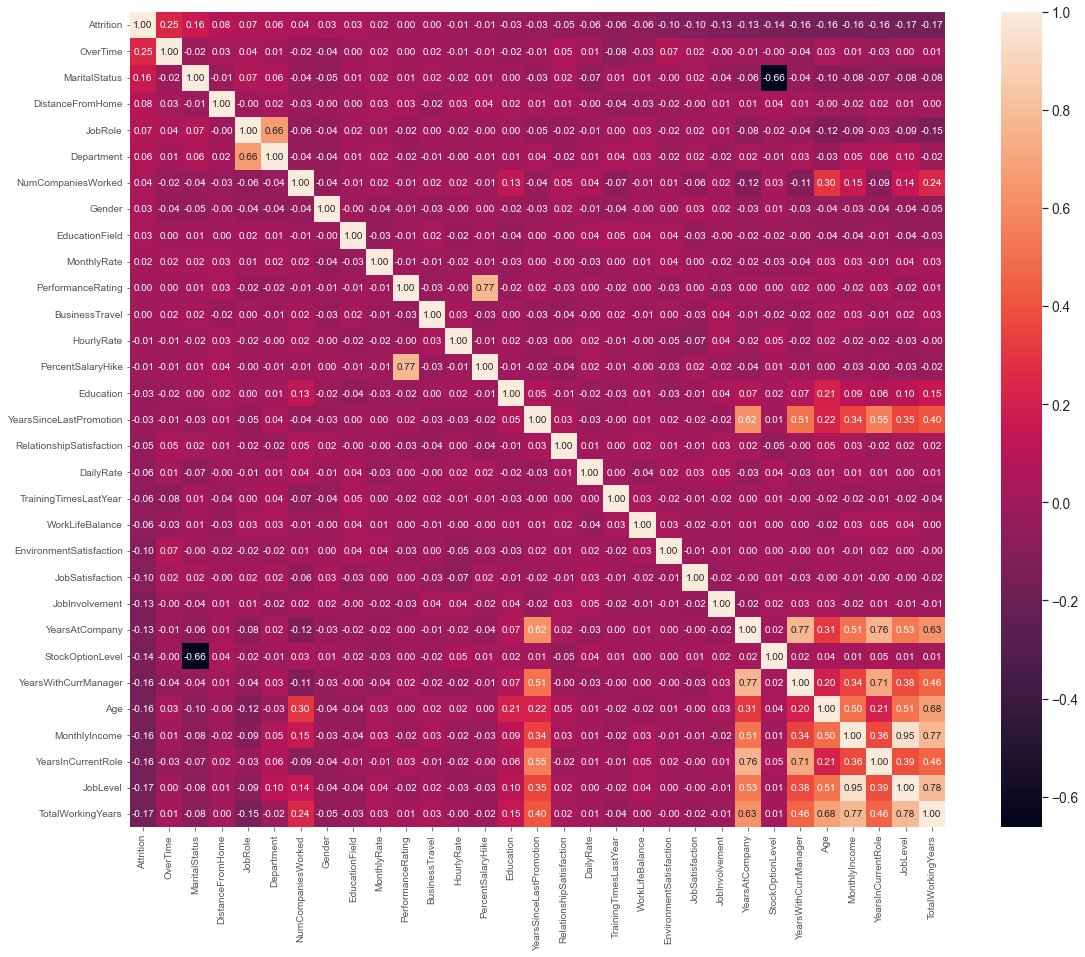

In [24]:
# Create Correlation Matrix
corrmat = encoded_df.corr()

# Attrition correlation matrix
k = 31 # Number of variables for heatmap in alphabetical order of column list
cols = corrmat.nlargest(k, 'Attrition')['Attrition'].index

# Correlation Matrix
cm = np.corrcoef(encoded_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Drop one of the columns where correlation between the columns is more than 75%

# Here is a graphical visualization of variables with correlation more than 75% as observed in above heatmap

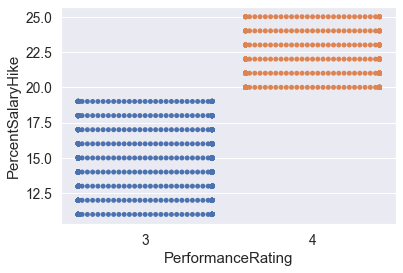

In [25]:
# Box plot PerformanceRating vs PercentSalaryHike
data = pd.concat([encoded_df['PerformanceRating'], encoded_df['PercentSalaryHike']], axis=1)
plt.figure(figsize = (6,4))
sns.swarmplot(y='PercentSalaryHike', x='PerformanceRating', data = data)
plt.show()

# Insight: PerformanceRating and PercentSalaryHike are strongly correlated. Hence drop PerformanceRating

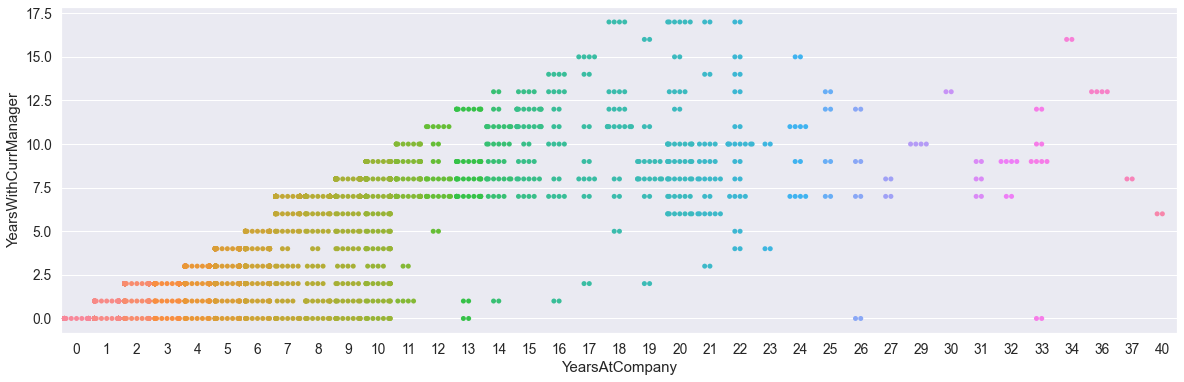

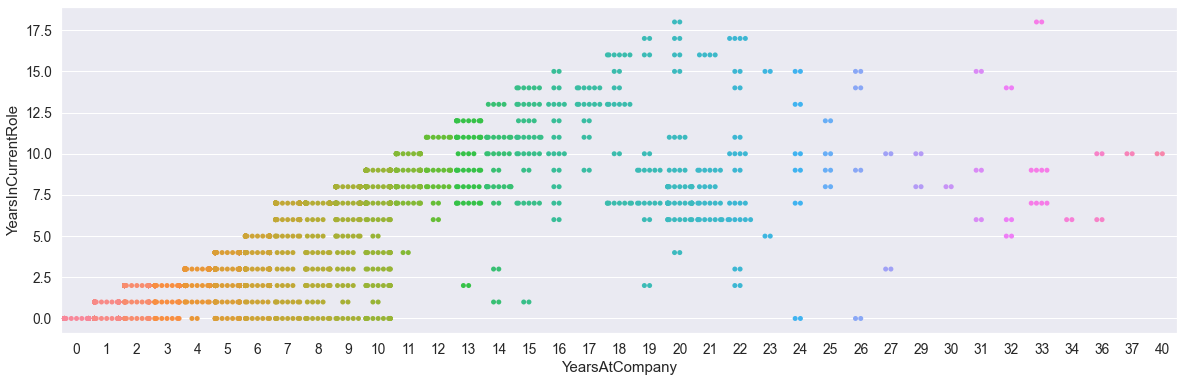

In [26]:
# Pair plot YearsAtCompany, YearsWithCurrManager and YearsInCurrentRole

data = pd.concat([df['YearsAtCompany'], df['YearsWithCurrManager'], df['YearsInCurrentRole']], axis=1)
plt.figure(figsize = (20,6))
sns.swarmplot(y='YearsWithCurrManager', x='YearsAtCompany', data = data)
plt.show()

plt.figure(figsize = (20,6))
sns.swarmplot(y='YearsInCurrentRole', x='YearsAtCompany', data = data)
plt.show()

# Insights: YearsAtCompany, YearsWithCurrManager and YearsInCurrentRole are strongly correlated. Hence drop 
# YearsWithCurrManager and YearsInCurrentRole

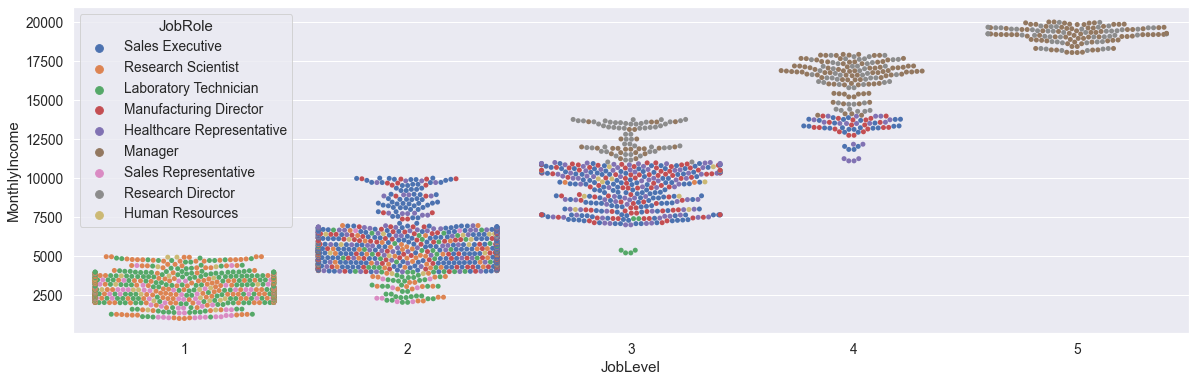

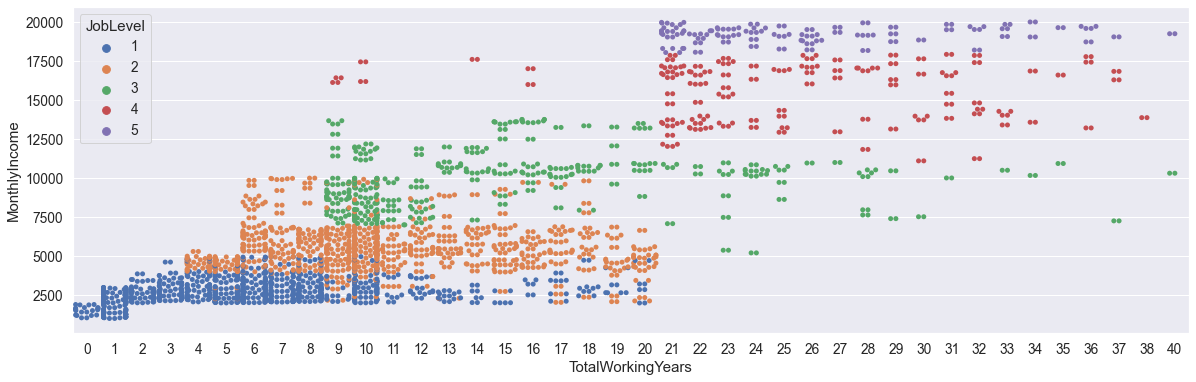

In [27]:
# Swarm plot MonthlyIncome, JobLevel and TotalWorkingYears

data = pd.concat([df['MonthlyIncome'], df['JobLevel'], df['JobRole'], df['TotalWorkingYears']], axis=1)
plt.figure(figsize = (20,6))
sns.swarmplot(y='MonthlyIncome', x='JobLevel', data = data, hue = 'JobRole')
plt.show()

#data = pd.concat([df['MonthlyIncome'], df['TotalWorkingYears']], axis=1)
plt.figure(figsize = (20,6))
sns.swarmplot(y='MonthlyIncome', x='TotalWorkingYears', data = data, hue = 'JobLevel')
plt.show()

# Insights: MonthlyIncome, JobLevel and TotalWorkingYears are strongly correlated. Hence drop TotalWorkingYears and JobLevel

In [28]:
# Columns to drop based on above correlations:
# 'PerformanceRating', 'YearsWithCurrManager', 'YearsInCurrentRole', 'TotalWorkingYears', 'JobLevel'

encoded_df.drop(['PerformanceRating', 'YearsWithCurrManager', 'YearsInCurrentRole', 'TotalWorkingYears', 'JobLevel'], 
                axis = 1, inplace = True)

In [29]:
encoded_df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion'],
      dtype='object')

# Plot correlation matrix again after dropping strongly correlated variables

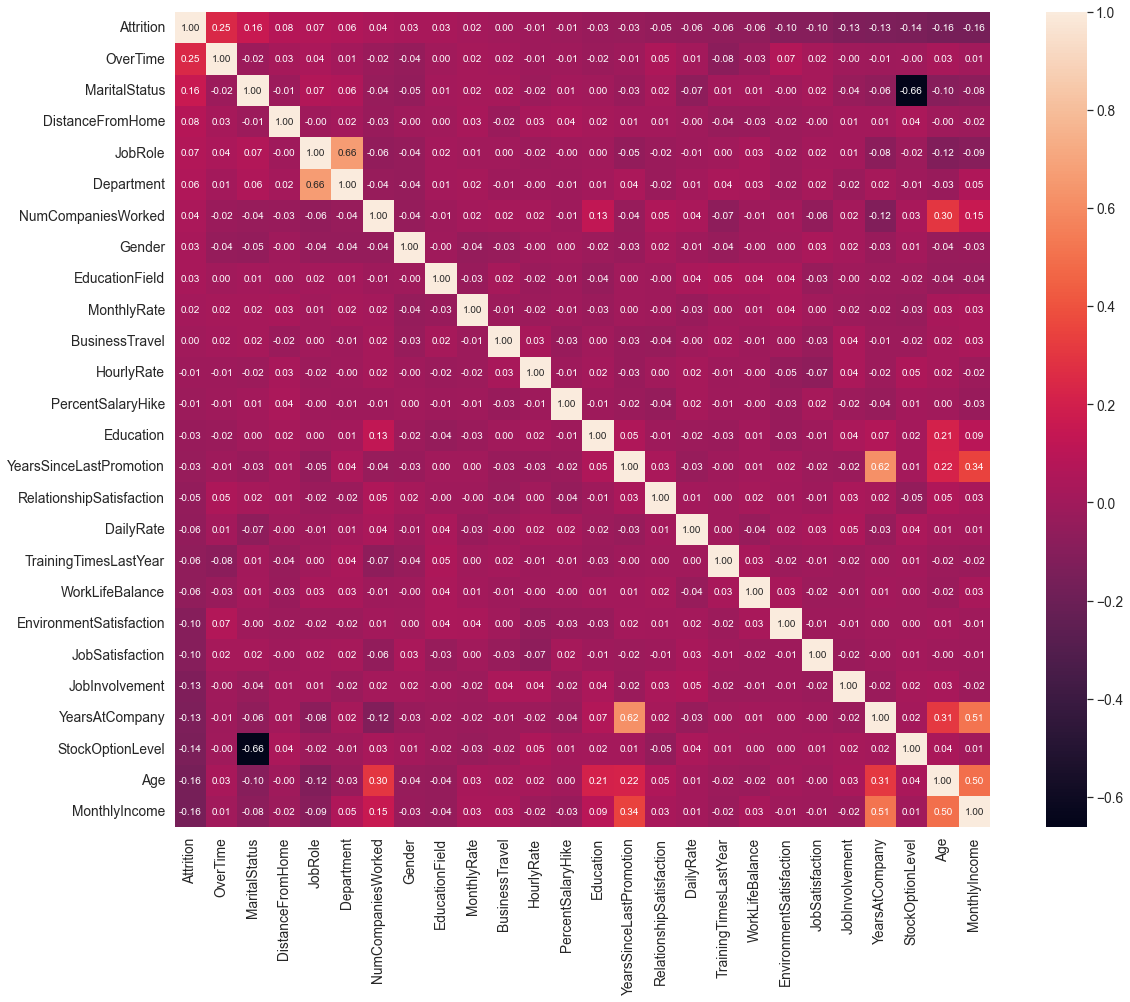

In [30]:
# Create Correlation Matrix
corrmat = encoded_df.corr()

# Attrition correlation matrix
k = 31 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'Attrition')['Attrition'].index

# Correlation Matrix
cm = np.corrcoef(encoded_df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=1.25)

# Plot the Heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Visualize Correlation of moderately Correlated variables on Target Variable

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

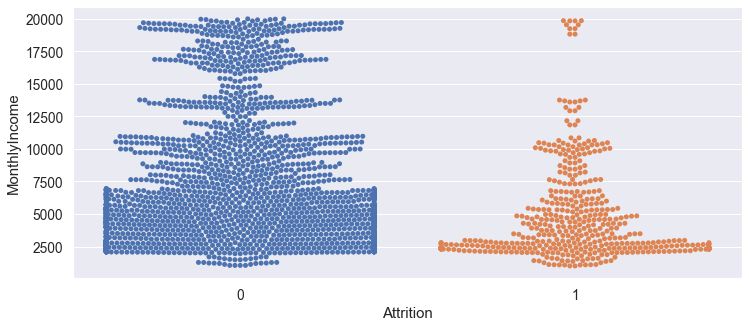

In [31]:
# MonthlyIncome vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'MonthlyIncome'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the monthly income, higher the chances of attrition. Highest attrition is in the salary range of 1000 to 3000

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

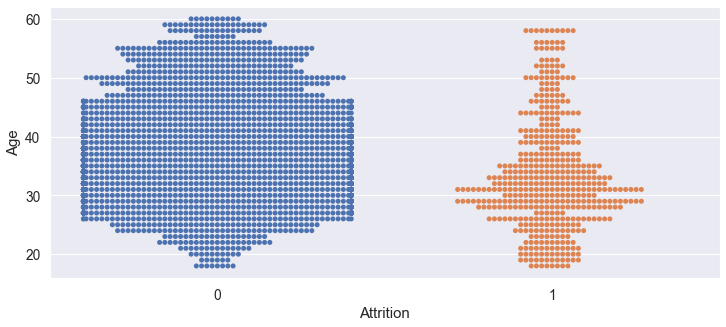

In [32]:
# Age vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'Age'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Age, higher the chances of attrition, especially in the age bracket of 25 to 35

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

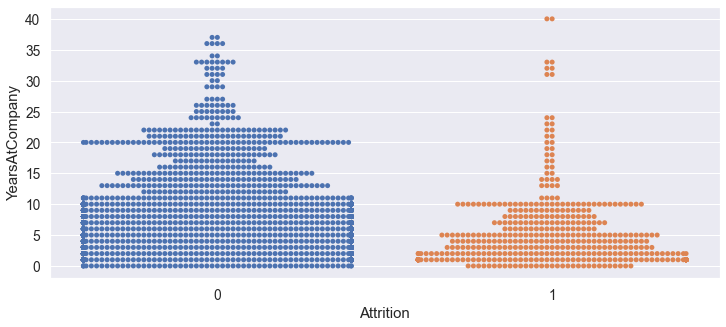

In [33]:
# YearsAtCompany vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'YearsAtCompany'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Number of Years at Company, higher the chances of attrition, especially for employees under 5 years at the company

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

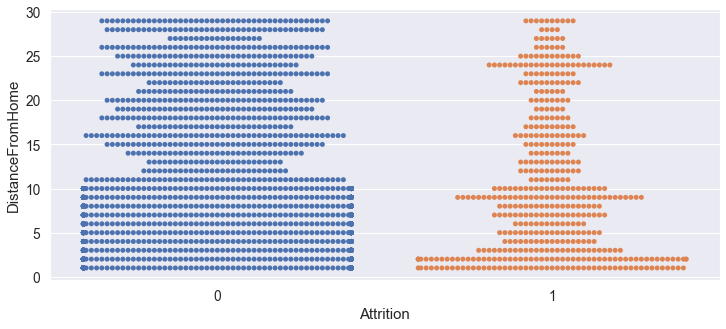

In [34]:
# DistanceFromHome vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'DistanceFromHome'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Distance from Home, slightly higher the chances of attrition

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

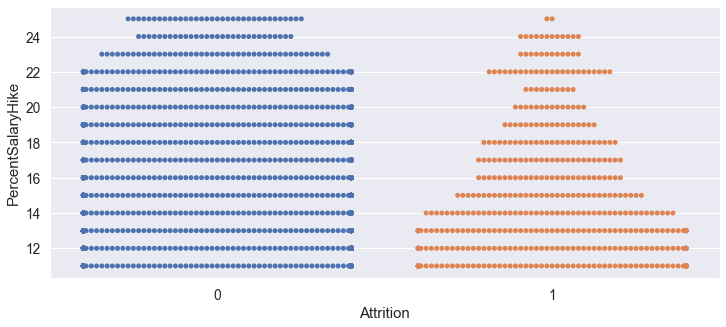

In [35]:
# PercentSalaryHike vs Attrition
f, ax = plt.subplots(figsize=(12,5))
var = 'PercentSalaryHike'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.swarmplot(y=var, x='Attrition', data=data)

# Insights: Lower the Salary Hike, higher the chances of attrition

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

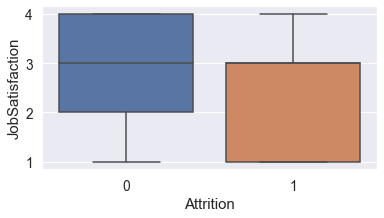

In [36]:
# JobSatisfaction vs Attrition
f, ax = plt.subplots(figsize=(6,3))
var = 'JobSatisfaction'
data = pd.concat([encoded_df['Attrition'], encoded_df[var]], axis=1)
sns.boxplot(y=var, x='Attrition', data=data)

# Insights: Lower the rate of Job Satisfaction, Higher the chances of Attrition

# Remove Outliers from numeric columns / columns with maximum weight by replacing outliers with 20th and 80th Pecentile data

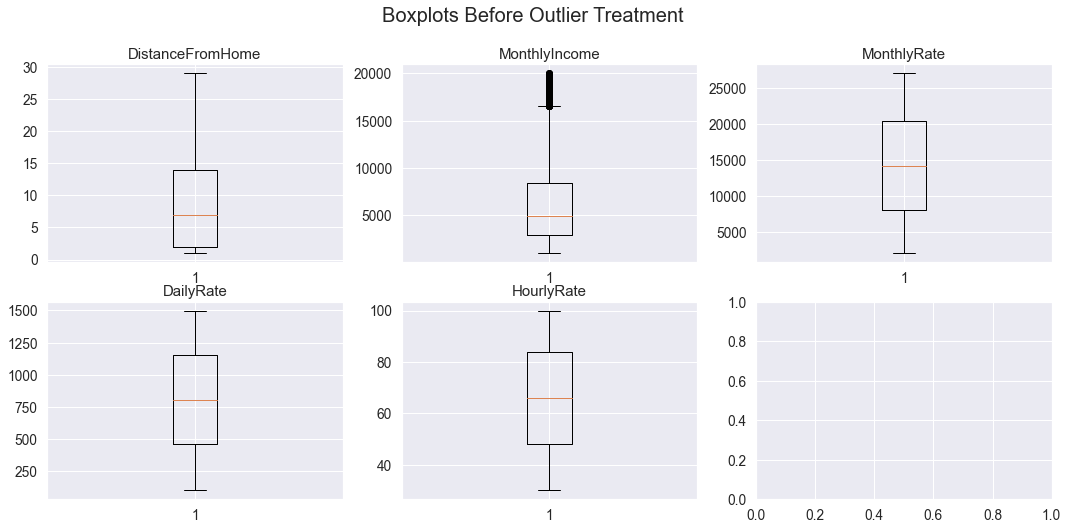

In [37]:
cols = list(encoded_df[["DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"]].columns)                          # Extract the COlumn Names as a list
fig, ax = plt.subplots(2, 3, figsize=(18, 8))    # Create sub plots of 2 rows and 3 columns as we have 6 columns to plot
c = 0
for i in range(2):
    for j in range(3):
        try:
            ax[i, j].boxplot(encoded_df[[cols[c]]])
            ax[i, j].set_title(cols[c])
        except:
            pass
        c=c+1 
fig.suptitle("Boxplots Before Outlier Treatment", fontsize=20)
plt.show()

In [38]:
# There are 5 numeric columns in our dataset, each having outliers namely:
# "DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"

print("Before Removing Outliers")
encoded_df[["DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"]].describe()

# Insights: Idea is to replace all values above 80th Percentile with 80th percentile value and
# replace all values below 20th Percentile with 20th percentile value

Before Removing Outliers


,DistanceFromHome,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,9.192517,6502.931293,14313.103401,802.485714,65.891156
std,8.105485,4707.155770,7116.575021,403.440447,20.325969
min,1.000000,1009.000000,2094.000000,102.000000,30.000000
25%,2.000000,2911.000000,8045.000000,465.000000,48.000000
50%,7.000000,4919.000000,14235.500000,802.000000,66.000000
75%,14.000000,8380.000000,20462.000000,1157.000000,84.000000
max,29.000000,19999.000000,26999.000000,1499.000000,100.000000


In [39]:
encoded_df["DistanceFromHome"].loc[encoded_df["DistanceFromHome"] < encoded_df["DistanceFromHome"].quantile(0.20)] = encoded_df["DistanceFromHome"].quantile(0.20)
encoded_df["DistanceFromHome"].loc[encoded_df["DistanceFromHome"] > encoded_df["DistanceFromHome"].quantile(0.80)] = encoded_df["DistanceFromHome"].quantile(0.80)

In [40]:
encoded_df["MonthlyIncome"].loc[encoded_df["MonthlyIncome"] < encoded_df["MonthlyIncome"].quantile(0.20)] = encoded_df["MonthlyIncome"].quantile(0.20)
encoded_df["MonthlyIncome"].loc[encoded_df["MonthlyIncome"] > encoded_df["MonthlyIncome"].quantile(0.80)] = encoded_df["MonthlyIncome"].quantile(0.80)

In [41]:
encoded_df["MonthlyRate"].loc[encoded_df["MonthlyRate"] < encoded_df["MonthlyRate"].quantile(0.20)] = encoded_df["MonthlyRate"].quantile(0.20)
encoded_df["MonthlyRate"].loc[encoded_df["MonthlyRate"] > encoded_df["MonthlyRate"].quantile(0.80)] = encoded_df["MonthlyRate"].quantile(0.80)

In [42]:
encoded_df["DailyRate"].loc[encoded_df["DailyRate"] < encoded_df["DailyRate"].quantile(0.20)] = encoded_df["DailyRate"].quantile(0.20)
encoded_df["DailyRate"].loc[encoded_df["DailyRate"] > encoded_df["DailyRate"].quantile(0.80)] = encoded_df["DailyRate"].quantile(0.80)

In [43]:
encoded_df["HourlyRate"].loc[encoded_df["HourlyRate"] < encoded_df["HourlyRate"].quantile(0.20)] = encoded_df["HourlyRate"].quantile(0.20)
encoded_df["HourlyRate"].loc[encoded_df["HourlyRate"] > encoded_df["HourlyRate"].quantile(0.80)] = encoded_df["HourlyRate"].quantile(0.80)

In [44]:
print("After Removing Outliers")
encoded_df[["DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"]].describe()

After Removing Outliers


,DistanceFromHome,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,8.114966,5643.791293,14293.930340,805.409524,66.015646
std,5.757583,2719.735935,5767.356603,323.539055,16.337139
min,2.000000,2695.800000,6887.400000,391.800000,45.000000
25%,2.000000,2911.000000,8045.000000,465.000000,48.000000
50%,7.000000,4919.000000,14235.500000,802.000000,66.000000
75%,14.000000,8380.000000,20462.000000,1157.000000,84.000000
max,17.000000,9860.000000,21712.000000,1224.200000,87.000000


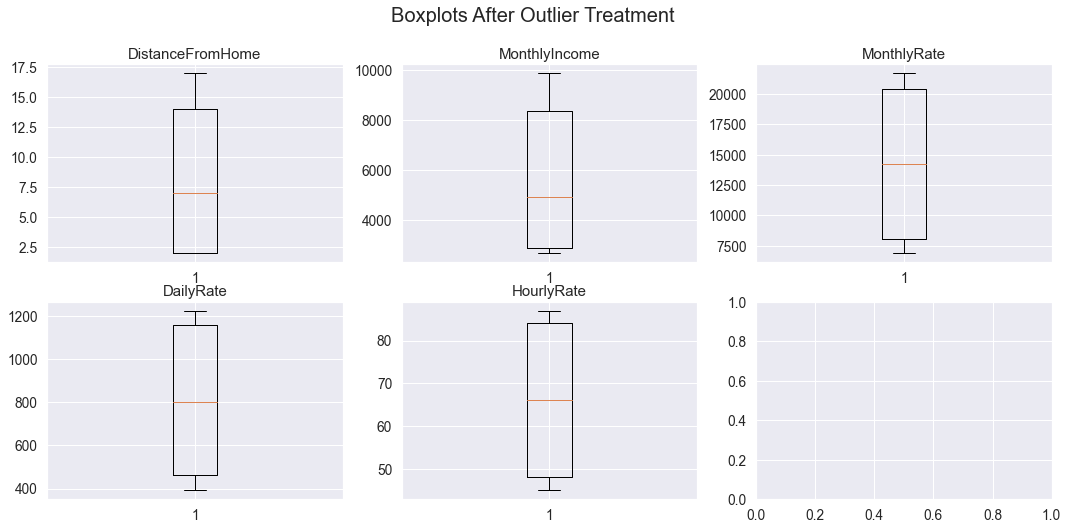

In [45]:
# Plot the BoxPlots to verify the effect of Outlier Treatment


cols = list(encoded_df[["DistanceFromHome","MonthlyIncome","MonthlyRate","DailyRate","HourlyRate"]].columns)                          # Extract the COlumn Names as a list
fig, ax = plt.subplots(2, 3, figsize=(18, 8))    # Create sub plots of 2 rows and 3 columns as we have 6 columns to plot
c = 0
for i in range(2):
    for j in range(3):
        try:
            ax[i, j].boxplot(encoded_df[[cols[c]]])
            ax[i, j].set_title(cols[c])
        except:
            pass
        c=c+1 
fig.suptitle("Boxplots After Outlier Treatment", fontsize=20)
plt.show()

# Final Summary of Insights

In [46]:
# Understanding the Dataset:

# Insight 1 : The dataset has 2940 rows and 35 columns
# Insight 2 : There are 9 object type variable columns that we will either drop or convert to numeric
# Insight 3 : There is no missing data in any of the columns
# Insight 4 : There are more males than females in the dataset
# Insight 5 : Males are slightly more likely to quit (17%) than Females (14.8%)
# Insight 6 : Attrition is high for Single Employees (25.5%) compared to Married (12.5%) and Divorced (10%)
# Insight 7 : Employees working overtime has a much higher Attrition (30%) than employees not working overtime (10%)
# Insight 8 : Attrition is highest among employees who travel frequently (25%), folowed by those who travel rarely (15%)
# Insight 9 : Attrition is highest in Sales (20.6%), followed by Human Resources (19%)
# Insight 10: Attrition is highest among Sales Representatives (39.7%), followed by Lab Technician (23.9%) and Human Resources (23%)

##########################################################################################

# Finding and Dropping Strongly Correlated Columns: 

# Insight 11: PerformanceRating and PercentSalaryHike are strongly correlated. Hence drop PerformanceRating
# Insight 12: YearsAtCompany, YearsWithCurrManager and YearsInCurrentRole are strongly correlated. Hence drop YearsWithCurrManager and YearsInCurrentRole
# Insight 13: MonthlyIncome, JobLevel and TotalWorkingYears are strongly correlated. Hence drop TotalWorkingYears and JobLevel

##########################################################################################

# Impact of other dependent variables on Target Variable:

# Insight 14: Lower the monthly income, higher the chances of attrition. Highest attrition is in the salary range of 1000 to 3000
# Insight 15: Lower the Age, higher the chances of attrition, especially in the age bracket of 25 to 35
# Insight 16: Lower the Number of Years at Company, higher the chances of attrition, especially for employees under 5 years at the company
# Insight 17: Lower the Salary Hike, higher the chances of attrition
# Insight 18: Lower the rate of Job Satisfaction, Higher the chances of Attrition

##########################################################################################

# Removing Outliers:

# Insight 19: Replaced all values above 80th Percentile with 80th percentile value and replace all values below 20th Percentile with 20th percentile value

##########################################################################################